In [1]:
from google.colab import files
import pandas as pd

uploaded = files.upload()

df = pd.read_csv("creditcard.csv")

Saving creditcard.csv to creditcard.csv


In [2]:
# first few rows
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
# Counts columns and rows
print(df.shape)

(284807, 31)


In [ ]:
# Column names
print(df.columns)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [ ]:
# Counts fraud vs non-fraud rows
print((df["Class"] == 0).sum())
print((df["Class"] == 1).sum())

284315
492


Text(0, 0.5, 'Number of Transactions')

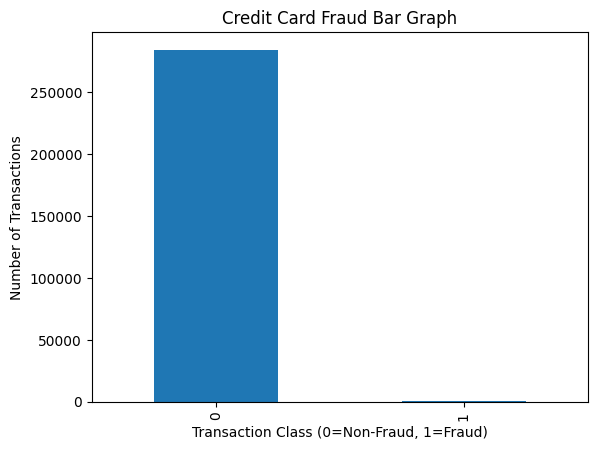

In [3]:
bar_graph = df.Class.value_counts().plot(kind="bar")
bar_graph.set_title("Credit Card Fraud Bar Graph")
bar_graph.set_xlabel("Transaction Class (0=Non-Fraud, 1=Fraud)")
bar_graph.set_ylabel("Number of Transactions")

Text(0, 0.5, 'Number of Transactions')

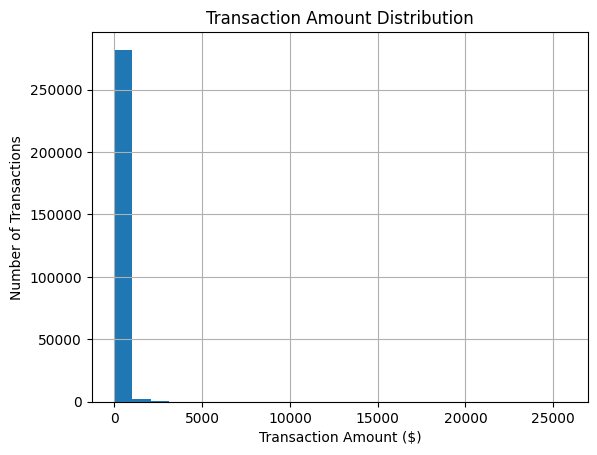

In [4]:
hist_graph1 = df.Amount.hist(bins=25)
hist_graph1.set_title("Transaction Amount Distribution")
hist_graph1.set_xlabel("Transaction Amount ($)")
hist_graph1.set_ylabel("Number of Transactions")

Text(0, 0.5, 'Number of Transactions')

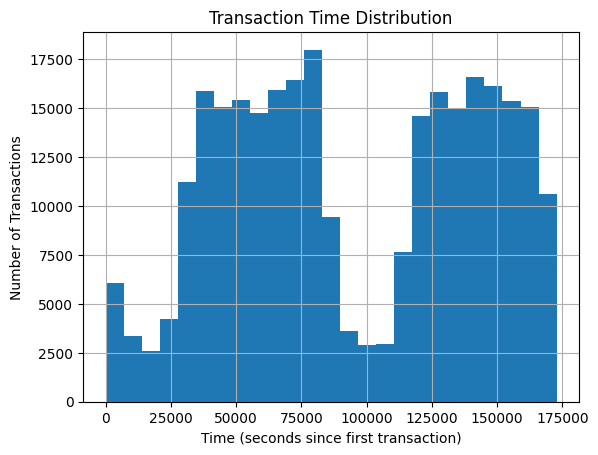

In [5]:
hist_graph2 = df.Time.hist(bins=25)
hist_graph2.set_title("Transaction Time Distribution")
hist_graph2.set_xlabel("Time (seconds since first transaction)")
hist_graph2.set_ylabel("Number of Transactions")

When looking at the class distribution, there are more non-fraud cases than fraud. This shows that the data is very imbalanced which will make the model harder to train.

The Amount histogram shows that most transactions are really small and only a few of them are very large. Since the range is so big, I will need to scale this column so it doesn't overpower the other features.

The Time histogram is not random since it has peaks and dips which is probably used to represent busy and quiet times of the day. Later on, I may create a new column like "Hour of Day" to make this info more useful.

In [6]:
from sklearn.model_selection import train_test_split

X = df.drop("Class", axis=1) # removes the Class column since Class is the answer
y = df["Class"] # Selects only Class column (y is the answer the model learns)

# Splits X and y into two sets being training and test
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2, # 20% goes to testing and 80% goes to training
    random_state=42, # seed used so the split is the same every time its run
    stratify=y # ensures same fraud/non-fraud ratio
)

print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)
print("Fraud cases in training:", sum(y_train))
print("Fraud cases in test:", sum(y_test))

Training set shape: (227845, 30) (227845,)
Test set shape: (56962, 30) (56962,)
Fraud cases in training: 394
Fraud cases in test: 98


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

# creates the model
# Sets to max_iter=1000 to give the model more time to finish training
# class_weight='balanced' makes fraud cases count more during training with each fraud mistake being penalized more than a non-fraud mistake
model = LogisticRegression(class_weight='balanced', max_iter=1000)
model.fit(X_train, y_train) # Tell the model to look at the training data (80% of data)

y_prediction = model.predict(X_test) # Use model to make predictions on test set (20% of data)

print(confusion_matrix(y_test, y_prediction))
print(classification_report(y_test, y_prediction))

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() # Changes scale of data without changing the meaning
# learns the mean and std of each column in the training set and then rescales the training data so each column has mean 0 and std 1
# Prevents big numbers (Amount) from overpowering smallers numbers (Time)
X_train_s = scaler.fit_transform(X_train)
# uses the same mean and std from training so test set is scaled the same way as the training set
X_test_s = scaler.transform(X_test)

model = LogisticRegression(class_weight='balanced', max_iter=1000)
model.fit(X_train_s, y_train)

y_prediction = model.predict(X_test_s)
print(confusion_matrix(y_test, y_prediction))
print(classification_report(y_test, y_prediction))

[[55478  1386]
 [    8    90]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.98     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.98      0.99     56962



In [9]:
from sklearn.metrics import roc_auc_score

# provides the probability that each row belongs to class 0/1
# [:, 1] takes only the fraud probability
probabilities = model.predict_proba(X_test_s)[:, 1]
print("ROC-AUC:", roc_auc_score(y_test,probabilities))

ROC-AUC: 0.9720834996210077


In [10]:
from sklearn.ensemble import RandomForestClassifier

# asks hundreds of decision trees to each vote fraud or not and goes with the majority vote
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model.fit(X_train_s, y_train) # forest studies training data and builds its trees

RandomForestClassifier(class_weight='balanced', random_state=42)

In [11]:
y_pred_rf = rf_model.predict(X_test_s) # asks forest to guess fraud / not fraud on test set

print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

[[56861     3]
 [   25    73]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.96      0.74      0.84        98

    accuracy                           1.00     56962
   macro avg       0.98      0.87      0.92     56962
weighted avg       1.00      1.00      1.00     56962



In [12]:
from sklearn.metrics import roc_auc_score

probability_rf = rf_model.predict_proba(X_test_s)[:, 1]
print("ROC-AUC (RF):", roc_auc_score(y_test, probability_rf))

ROC-AUC (RF): 0.9529050875414883


In [13]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

probability_lr = model.predict_proba(X_test_s)[:, 1] # gets probability of fraud for each row
y_pred_rf = model.predict(X_test_s) # provides hard predictions

probability_rf = rf_model.predict_proba(X_test_s)[:, 1] # get probability of fraud for each row using Random Forest
y_pred_rf = rf_model.predict(X_test_s) # provide hard predictions using Random Forest

print("LR ROC-AUC:", roc_auc_score(y_test, probability_lr))
print("RF ROC-AUC:", roc_auc_score(y_test, probability_rf))

LR ROC-AUC: 0.9720834996210077
RF ROC-AUC: 0.9529050875414883


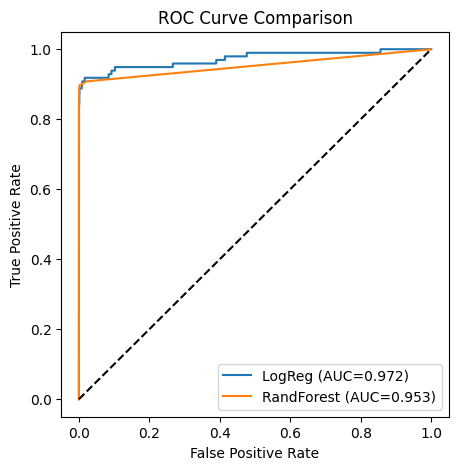

In [15]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Calculate ROC values for Logistic Regression
fpr_lr, tpr_lr, _ = roc_curve(y_test, probability_lr) # False positive rate values on the x-axis
fpr_rf, tpr_rf, _ = roc_curve(y_test, probability_rf) # True poisitive rate values on y-axis

plt.figure(figsize=(5,5))
plt.plot(fpr_lr, tpr_lr, label=f"LogReg (AUC={roc_auc_score(y_test, probability_lr):.3f})") # plot the ROC curve for Logistic regression
plt.plot(fpr_rf, tpr_rf, label=f"RandForest (AUC={roc_auc_score(y_test, probability_rf):.3f})") # plot the ROC curve or Random Forest
plt.plot([0, 1], [0, 1], 'k--')  # plots the diagnal dashed line for random guessing
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()

| Model                  | Recall (fraud=1) | Precision (fraud=1) | ROC-AUC |
|------------------------|------------------|----------------------|--------|
| Logistic Regression    | 0.92             | 0.06                 | 0.972  |
| Random Forest          | 0.74             | 0.96                 | 0.953  |

In conclusion, this dataset was very imbalanced with there being more non-fraud cases than fraud cases. Logistic Regression caught the most fraud cases but gave many false fraud cases. Random forest was much more precise with fewer false alarms but it did miss more fraud cases. Both of them had very good ROC-AUC scores which shows that they can seperate fraud from non-fraud very well. If the goal was to catch as many frauds as possible then Logistic Regression would be used but if the goal was to only alert when very confident, then Random Forest would be used.